# MSTA: Lesson 2
Brandon Auyeung

Day 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
import numpy as np
import scipy.integrate as spi
import scipy.stats as stats

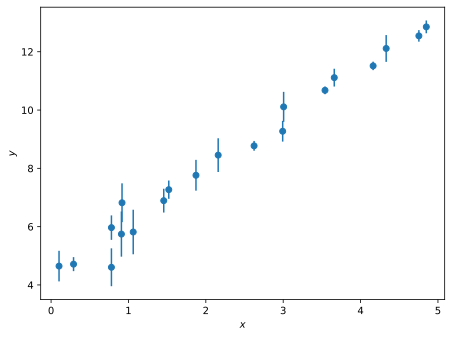

In [2]:
# Configure Jupyter Notebook to display Matplotlib figures as SVG images 
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
 
# Initialize a random number generator with a specific seed to ensure reproducibility 
rnd = np.random.RandomState(seed=42)  # Setting a specific seed value for consistency 
 
# Specify the number of data points 
n_data = 20 
 
# Define the true coefficients for a linear model 
a_true = 1.73  # Modifying the slope coefficient 
b_true = 4.53  # Adjusted the linear term coefficient 
 
# Generate an array of random 'x' values uniformly distributed in the range [0, 5]
x = rnd.uniform(0, 5, n_data)  # Creating random 'x' values within a different range 
 
# Calculate the corresponding 'y' values using the true linear model 
y = a_true * x + b_true  # Calculating 'y' values 
 
# Introduce random heteroscedastic Gaussian uncertainties in the 'y' values 
y_err = rnd.uniform(0.1, 0.8, size=n_data)  # Defining uncertainties with different range 
 
# Add Gaussian noise to the 'y' data 
y = y + rnd.normal(0, y_err)  # Incorporating Gaussian noise into 'y' data 
 
# Plot data 
plt.errorbar(x, y, y_err, marker='o', linestyle='none') 
plt.xlabel('$x$') 
plt.ylabel('$y$') 
plt.tight_layout() 

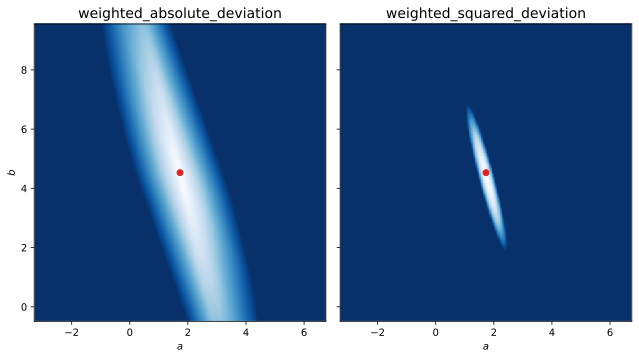

In [3]:
# Define a function to compute the y-values for a straight line model at given x-values. 
def line_model(parameters, x_values): 
    return parameters[0] * np.array(x_values) + parameters[1] 
 
# Define a function to calculate the weighted absolute deviation between data and model predictions. 
def weighted_absolute_deviation(parameters, x, y, y_error): 
    residuals = (y - line_model(parameters, x)) / y_error 
    return np.sum(np.abs(residuals)) 
 
# Define a function to calculate the weighted squared deviation between data and model predictions. 
def weighted_squared_deviation(parameters, x, y, y_error): 
    residuals = (y - line_model(parameters, x)) / y_error 
    return np.sum(residuals**2) 
 
# Create a grid of parameter values, centered on the true values. 
a_grid = np.linspace(a_true - 5.0, a_true + 5.0, 256) 
b_grid = np.linspace(b_true - 5.0, b_true + 5.0, 256) 
a_grid, b_grid = np.meshgrid(a_grid, b_grid) 
ab_grid = np.vstack((a_grid.ravel(), b_grid.ravel())).T 
 
# Create a figure with two subplots for visualization.
fig, axes = plt.subplots(1, 2, figsize=(9, 5.1), sharex=True, sharey=True) 
 
# Calculate and plot weighted absolute deviation and weighted squared deviation. 
for i, func in enumerate([weighted_absolute_deviation, weighted_squared_deviation]): 
    func_values = np.zeros(ab_grid.shape[0]) 
    for j, parameters in enumerate(ab_grid): 
        func_values[j] = func(parameters, x, y, y_err) 
    axes[i].pcolormesh(a_grid, b_grid, func_values.reshape(a_grid.shape), shading='nearest', cmap='Blues', vmin=func_values.min(), vmax=func_values.min() + 256, rasterized=True)  # Arbitrary scale 
    axes[i].set_xlabel('$a$') 
    # Plot the true values as a reference point. 
    axes[i].plot(a_true, b_true, marker='o', zorder=10, color='tab:red') 
    axes[i].axis('tight') 
    axes[i].set_title(func.__name__, fontsize=14) 

axes[0].set_ylabel('$b$') 
 
fig.tight_layout() 
 
# Display the plot. 
plt.show() 



Day 2

Estimated a: 2.359
Estimated b: 1.846


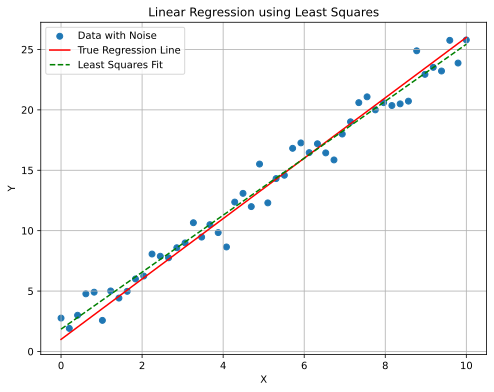

In [4]:
# Generate synthetic data with a linear relationship: y = a * x + b + noise
np.random.seed(0)
x = np.linspace(0, 10, 50) # Independent variable
a_true = 2.5 # True slope
b_true = 1.0 # True intercept
noise = np.random.normal(0, 1, len(x)) # Additive noisec
y = a_true * x + b_true + noise # Dependent variable with noise
# Calculate the least squares estimates for 'a' and 'b'
x_mean = np.mean(x)
y_mean = np.mean(y)
xy_mean = np.mean(x * y)
x_squared_mean = np.mean(x**2)
a_est = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean**2)
b_est = y_mean - a_est * x_mean
# Plot the original data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data with Noise')
plt.plot(x, a_true * x + b_true, color='red', label='True Regression Line')
plt.plot(x, a_est * x + b_est, color='green', linestyle='--', label='Least Squares Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using Least Squares')
plt.grid(True)
# Display the estimated parameters
print(f"Estimated a: {a_est:.3f}")
print(f"Estimated b: {b_est:.3f}")
plt.show()

How do we quantify uncertainty between the model and the assumed 'true' definition?

In [5]:
# Generate some sample data
np.random.seed(0)
x = np.linspace(0, 10, 50) # Independent variable
a_true = 2.5 # True slope
b_true = 1.0 # True intercept
noise = np.random.normal(0, 2, len(x)) # Additive noise
y = a_true * x + b_true + noise # Dependent variable with noise
# Define the cost function to be minimized
def cost_function(a, b):
 predictions = a * x + b
 residuals = y - predictions
 return np.sum(residuals**2)
# Use an optimization method to minimize the cost function
from scipy.optimize import minimize
initial_guess = [0, 0] # Initial guess for a and b
result = minimize(lambda params: cost_function(params[0], params[1]), 
initial_guess, method='L-BFGS-B')
a_est, b_est = result.x
# Display the estimated parameters
print(f"Estimated a: {a_est:.3f}")
print(f"Estimated b: {b_est:.3f}")

Estimated a: 2.218
Estimated b: 2.693


Model Coefficients:
Slope (a): 1.4851122136847497
Intercept (b): 3.994764273899258


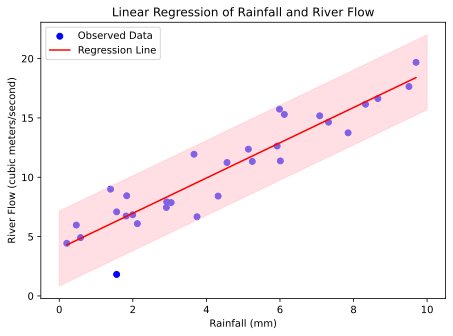

In [6]:
from sklearn.linear_model import LinearRegression

# Seed for reproducibility
np.random.seed(42)
# Generate synthetic data for 30 days of rainfall and river flow
n_days = 30
rainfall = np.random.uniform(0, 10, n_days) # Rainfall data (in mm)
a_true = 1.5 # True slope
b_true = 3.75 # True intercept
river_flow = a_true * rainfall + b_true # True relationship (assuming P is related to Q_river linearly)


# Introduce random Gaussian noise with varying standard deviation for river flow
flow_err = np.random.uniform(0, 3, n_days) # Noise standard deviations to use. max is 3 min is none. 
river_flow = river_flow + np.random.normal(0, flow_err)
# Reshape the data for regression
rainfall = rainfall.reshape(-1, 1)
river_flow = river_flow.reshape(-1, 1)
# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(rainfall, river_flow)
# Predict river flow values using the regression model
predicted_flow = regression_model.predict(rainfall)
# Plot the observed data and the regression line
plt.scatter(rainfall, river_flow, label='Observed Data', color='blue')
plt.plot(rainfall, predicted_flow, label='Regression Line', color='red')
plt.xlabel('Rainfall (mm)')
plt.ylabel('River Flow (cubic meters/second)')
plt.title('Linear Regression of Rainfall and River Flow')
plt.legend()
# Calculate and visualize the uncertainty in the regression model
x_test = np.linspace(0, 10, 100) # Generate test points
x_test = x_test.reshape(-1, 1) # Reshape to a 2D array
y_pred = regression_model.predict(x_test) # Predictions for test points
sigma = np.std(river_flow - predicted_flow) # Standard deviation of residuals
y_upper = y_pred + 1.96 * sigma # Upper confidence band (95% confidence interval)
y_lower = y_pred - 1.96 * sigma # Lower confidence band (95% confidence interval)
plt.fill_between(x_test[:,0], y_lower[:,0], y_upper[:,0], color='pink', 
alpha=0.5, label='Uncertainty (95% CI)') # not fully realistic, bc we dont rly change along the line (where more/less data is located and more/less noise is located)
# Display the model coefficients
print('Model Coefficients:')
print('Slope (a):', regression_model.coef_[0][0])
print('Intercept (b):', regression_model.intercept_[0])
plt.tight_layout()

<p style="page-break-after:always;"></p>

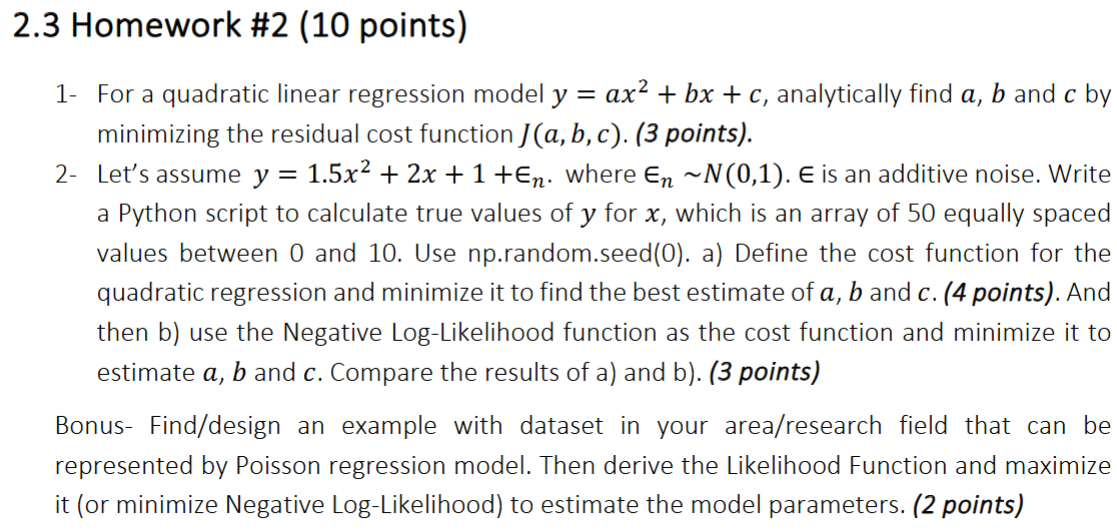

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
import numpy as np
import scipy.integrate as spi
import scipy.stats as stats
import scipy.optimize as opt

## 1: For a quadratic linear regression model $y = ax^2 + bx + c$, analytically find $a$, $b$ and $c$ by minimizing the residual cost function $𝐽(𝑎,𝑏,𝑐)$. (3 points).

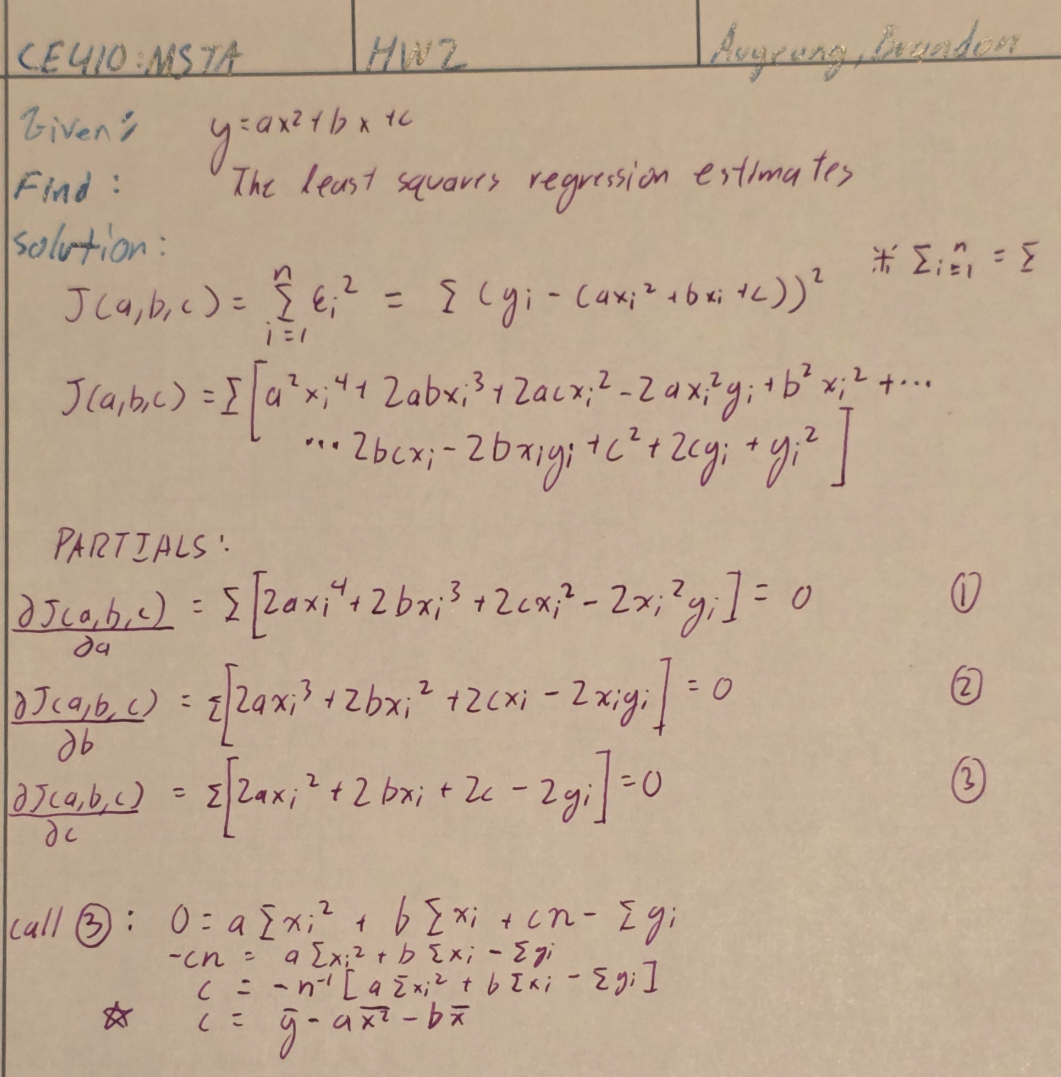

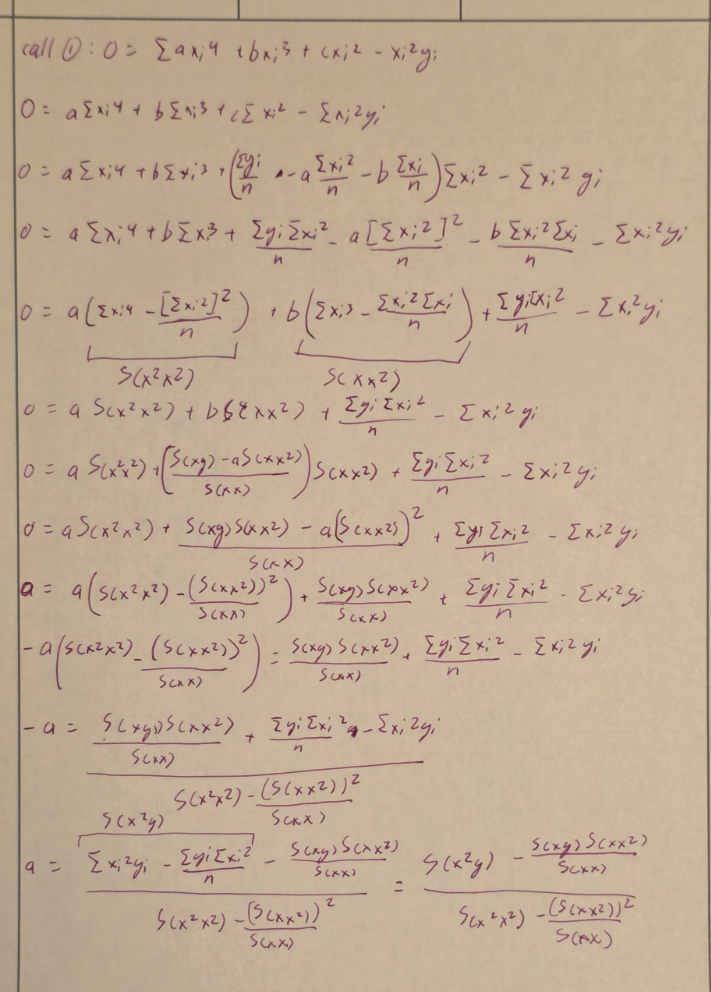

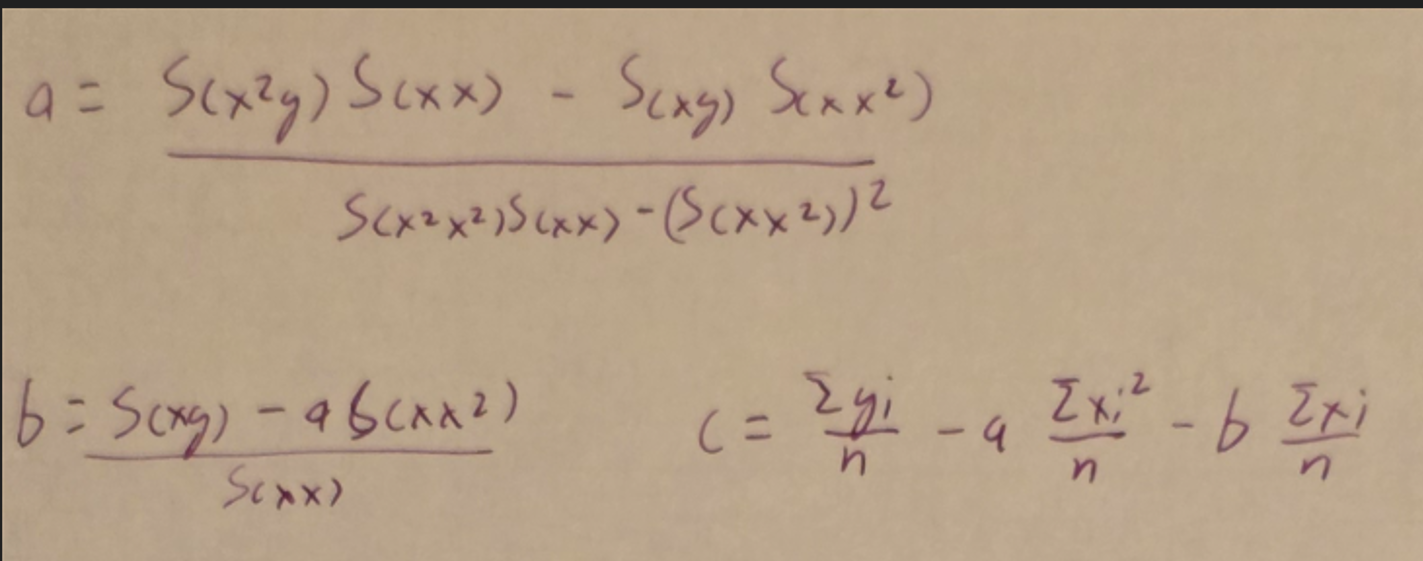

a =  1.0
b =  2.0
c =  4.0


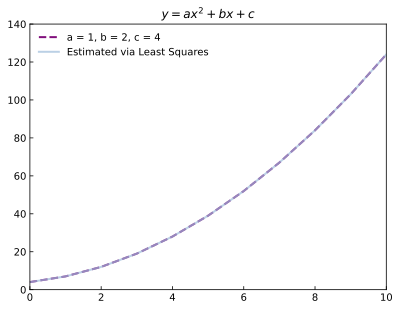

In [8]:
# check analytical solution using a known parameter set
a_set = 1
b_set = 2
c_set = 4
x_set = np.linspace(0,10,11)
y_set = a_set*x_set**2 + b_set*x_set + c_set
n = len(x_set)

# analytical solution
Sxx = np.sum(x_set**2) - (np.sum(x_set)**2/n)
Sxy = np.sum(x_set*y_set) - ((np.sum(x_set)*np.sum(y_set))/n)
Sxx2 = np.sum(x_set**3) - ((np.sum(x_set)*np.sum(x_set**2))/n)
Sx2y = np.sum((x_set**2)*y_set) - ((np.sum(x_set**2)*np.sum(y_set))/n)
Sx2x2 = np.sum(x_set**4) - ((np.sum(x_set**2)**2)/n)

a_mod = ((Sx2y * Sxx) - (Sxy * Sxx2)) / ((Sxx * Sx2x2) - (Sxx2**2))
b_mod = ((Sxy * Sx2x2) - (Sx2y * Sxx2))/((Sxx * Sx2x2) - (Sxx2**2))
c_mod = (np.sum(y_set) - a_mod*np.sum(x_set**2) - b_mod*np.sum(x_set)) / n

print("a = ", a_mod)
print("b = ", b_mod)
print("c = ", c_mod)

y_mod = a_mod*x_set**2 + b_mod*x_set + c_mod

# plot
fig, ax = subplots(1,1)
ax.plot(x_set,y_set, '--', label = "a = 1, b = 2, c = 4", color ="#810f7c", linewidth = 2)
ax.plot(x_set,y_mod, label = "Estimated via Least Squares", color = "#9ebcda", linewidth = 2, alpha = 0.7)
# plot your estimates from the least squares fit here. this should match perfectly, since the data has no noise.
ax.set_title('$y = ax^2 + bx + c$')
ax.tick_params(which="both", direction = "in")
ax.legend(frameon = False)
ax.set_xbound(0,10)
ax.set_ybound(0,140)

## 2: Let’s assume  $𝑦 = 1.5𝑥^2+ 2𝑥 + 1 + \mathbf{\epsilon} ; \mathbf{\epsilon} \sim \mathcal{N}(0,1)$. $\mathbf{\epsilon}$ is an additive noise. Write a Python script to calculate true values of $𝑦$ for $𝑥$, which is an array of 50 equally spaced values  between  0  and  10.  Use  np.random.seed(0).  
a)  Define  the  cost  function  for  the quadratic regression and minimize it to find the best estimate of 𝑎, 𝑏 and 𝑐. (4 points). 

b) use the Negative Log-Likelihood function as the cost function and minimize it to estimate 𝑎, 𝑏 and 𝑐. Compare the results of a) and b). (3 points) 

Via Least Squares:
 Estimated a: 1.509
 Estimated b: 1.767
 Estimated c: 1.997
Optimization terminated successfully.
         Current function value: 73.168419
         Iterations: 269
         Function evaluations: 488
Via MLE:
 Estimated a: 1.509
 Estimated b: 1.767
 Estimated c: 1.997


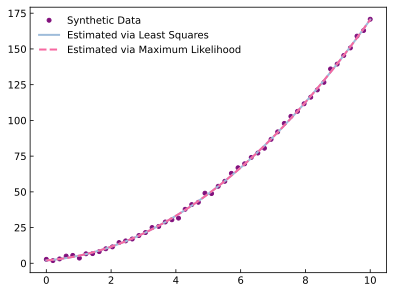

In [9]:
# create synthetic data set to fit curve to 
np.random.seed(0) # set seed for reproducibility
a = 1.5
b = 2
c = 1
epsilon = np.random.normal(0, 1, len(x)) # Additive noise
x = np.linspace(0,10,50)
y = a*x**2 + b*x + c + epsilon


# plot
fig, ax = subplots(1,1)
ax.plot(x,y, 'o', label = "Synthetic Data", color ="#810f7c", markersize = 4)
ax.tick_params(which="both", direction = "in")
ax.set_xbound(0,10)
ax.set_ybound(0,140)

# Define the cost function to be minimized
def cost_function(beta2, beta1, beta0):
 predictions = beta2*x**2 + beta1*x + beta0
 residuals = y - predictions
 return np.sum(residuals**2)

# Use an optimization method to minimize the cost function
from scipy.optimize import minimize
initial_guess = [0, 0, 0] # Initial guess for a, b, and c
result = minimize(lambda params: cost_function(params[0], params[1], params[2]), initial_guess)
a_est, b_est, c_est = result.x
# Display the estimated parameters
print("Via Least Squares:")
print(f" Estimated a: {a_est:.3f}")
print(f" Estimated b: {b_est:.3f}")
print(f" Estimated c: {c_est:.3f}")

y_pred = a_est*x**2 + b_est*x + c_est
ax.plot(x,y_pred, label = "Estimated via Least Squares", color = "#9ebcda", linewidth = 2)
ax.legend(frameon = False)

# use negative log-likelihood to determine goodness of fit
def negative_log_likelihood(theta, y_data, error):
    y_model = theta[0]*x**2 + theta[1]*x + theta[2]
    return -1 * -0.5 * np.sum(np.log(2*np.pi*error**2) + ((y_data - y_model)**2)/(error**2))

theta_est = opt.fmin(negative_log_likelihood, [0, 0, 0], args=(y, 1)) # ask Peyman abt whether to use 1 or epsilon
print("Via MLE:")
print(f" Estimated a: {theta_est[0]:.3f}")
print(f" Estimated b: {theta_est[1]:.3f}")
print(f" Estimated c: {theta_est[2]:.3f}")

y_pred = theta_est[0]*x**2 + theta_est[1]*x + theta_est[2]
ax.plot(x,y_pred, label = "Estimated via Maximum Likelihood", color = "#f768a1", linewidth = 2, linestyle= '--')
ax.legend(frameon = False)


Least Squares and MLE provide the same answer when using (y, 1) as the arguments. when using (y, epsilon) as the arguments, the answer is different; MLE is more accurate than Least Squares. 